In [1]:
%matplotlib inline

In [2]:
import os 
import numpy as np 
import matplotlib.pyplot as plt 
from PIL import Image

In [3]:
class ImageWrapper: 
    def __init__(self, img): 
        self.img = img 
        self.width, self.height = img.size 
        self.data = np.array(img) 
        self.out_data = self.data.copy() 
 
    def __getitem__(self, index): 
        x, y = index 
        if 0 <= x < self.width and 0 <= y < self.height: 
            return tuple(self.data[y, x]) 
        else: 
            return None 
 
    def __setitem__(self, index, value): 
        x, y = index 
        if 0 <= x < self.width and 0 <= y < self.height: 
            self.out_data[y, x] = value 
 
    def set_pixel(self, x, y, r, g, b): 
        if 0 <= x < self.width and 0 <= y < self.height: 
            self.out_data[y, x] = (r, g, b) 
 
    def swap_buffers(self): 
        self.data = self.out_data.copy() 
 
def add_gaussian_noise(img, noise_power=20): 
    img_array = np.array(img) 
    noise = np.random.normal(scale=noise_power, size=img_array.shape) 
    noisy_img = np.clip(img_array + noise, 0, 255).astype(np.uint8) 
    return Image.fromarray(noisy_img) 

Enter noise power:  10


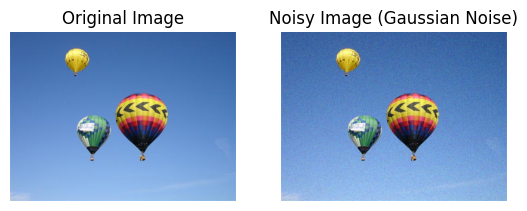

In [4]:
img = Image.open("assets/baloons.jpg") 
 
noise_power = float(input("Enter noise power: ")) 
noisy_img = add_gaussian_noise(img, noise_power) 

fig, axs = plt.subplots(1, 2) 
axs[0].imshow(img) 
axs[0].set_title('Original Image') 
axs[0].axis('off') 
axs[1].imshow(noisy_img) 
axs[1].set_title('Noisy Image (Gaussian Noise)') 
axs[1].axis('off') 
plt.show()